<a href="https://colab.research.google.com/github/Uday-ashes-uday/jobcv/blob/main/YOLOV11%5Bppe%2Cglove%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3OGuiL9j7e2EuDqIWmzn")
project = rf.workspace("vaibhav-jbwnp").project("ppe-hehno")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-1 in yolov11:: 100%|██████████| 14240/14240 [00:02<00:00, 6963.21it/s]


In [2]:
import os

#check whether number of images and labels are equal

train_ims,train_labs=len(os.listdir('/content/PPE-1/train/images')),len(os.listdir('/content/PPE-1/train/labels'))

assert train_ims==train_labs,'Number of images and labels are not equal'

In [3]:
test_ims,test_labs=len(os.listdir('/content/PPE-1/test/images')),len(os.listdir('/content/PPE-1/test/labels'))

assert test_ims==test_labs,'Number of images and labels are not equal'

In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 14.6 MB/s eta 0:00:00


In [5]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.8/112.6 GB disk)


In [6]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/PPE-1/data.yaml epochs=5 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 307MB/s]
New https://pypi.org/project/ultralytics/8.3.225 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/PPE-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

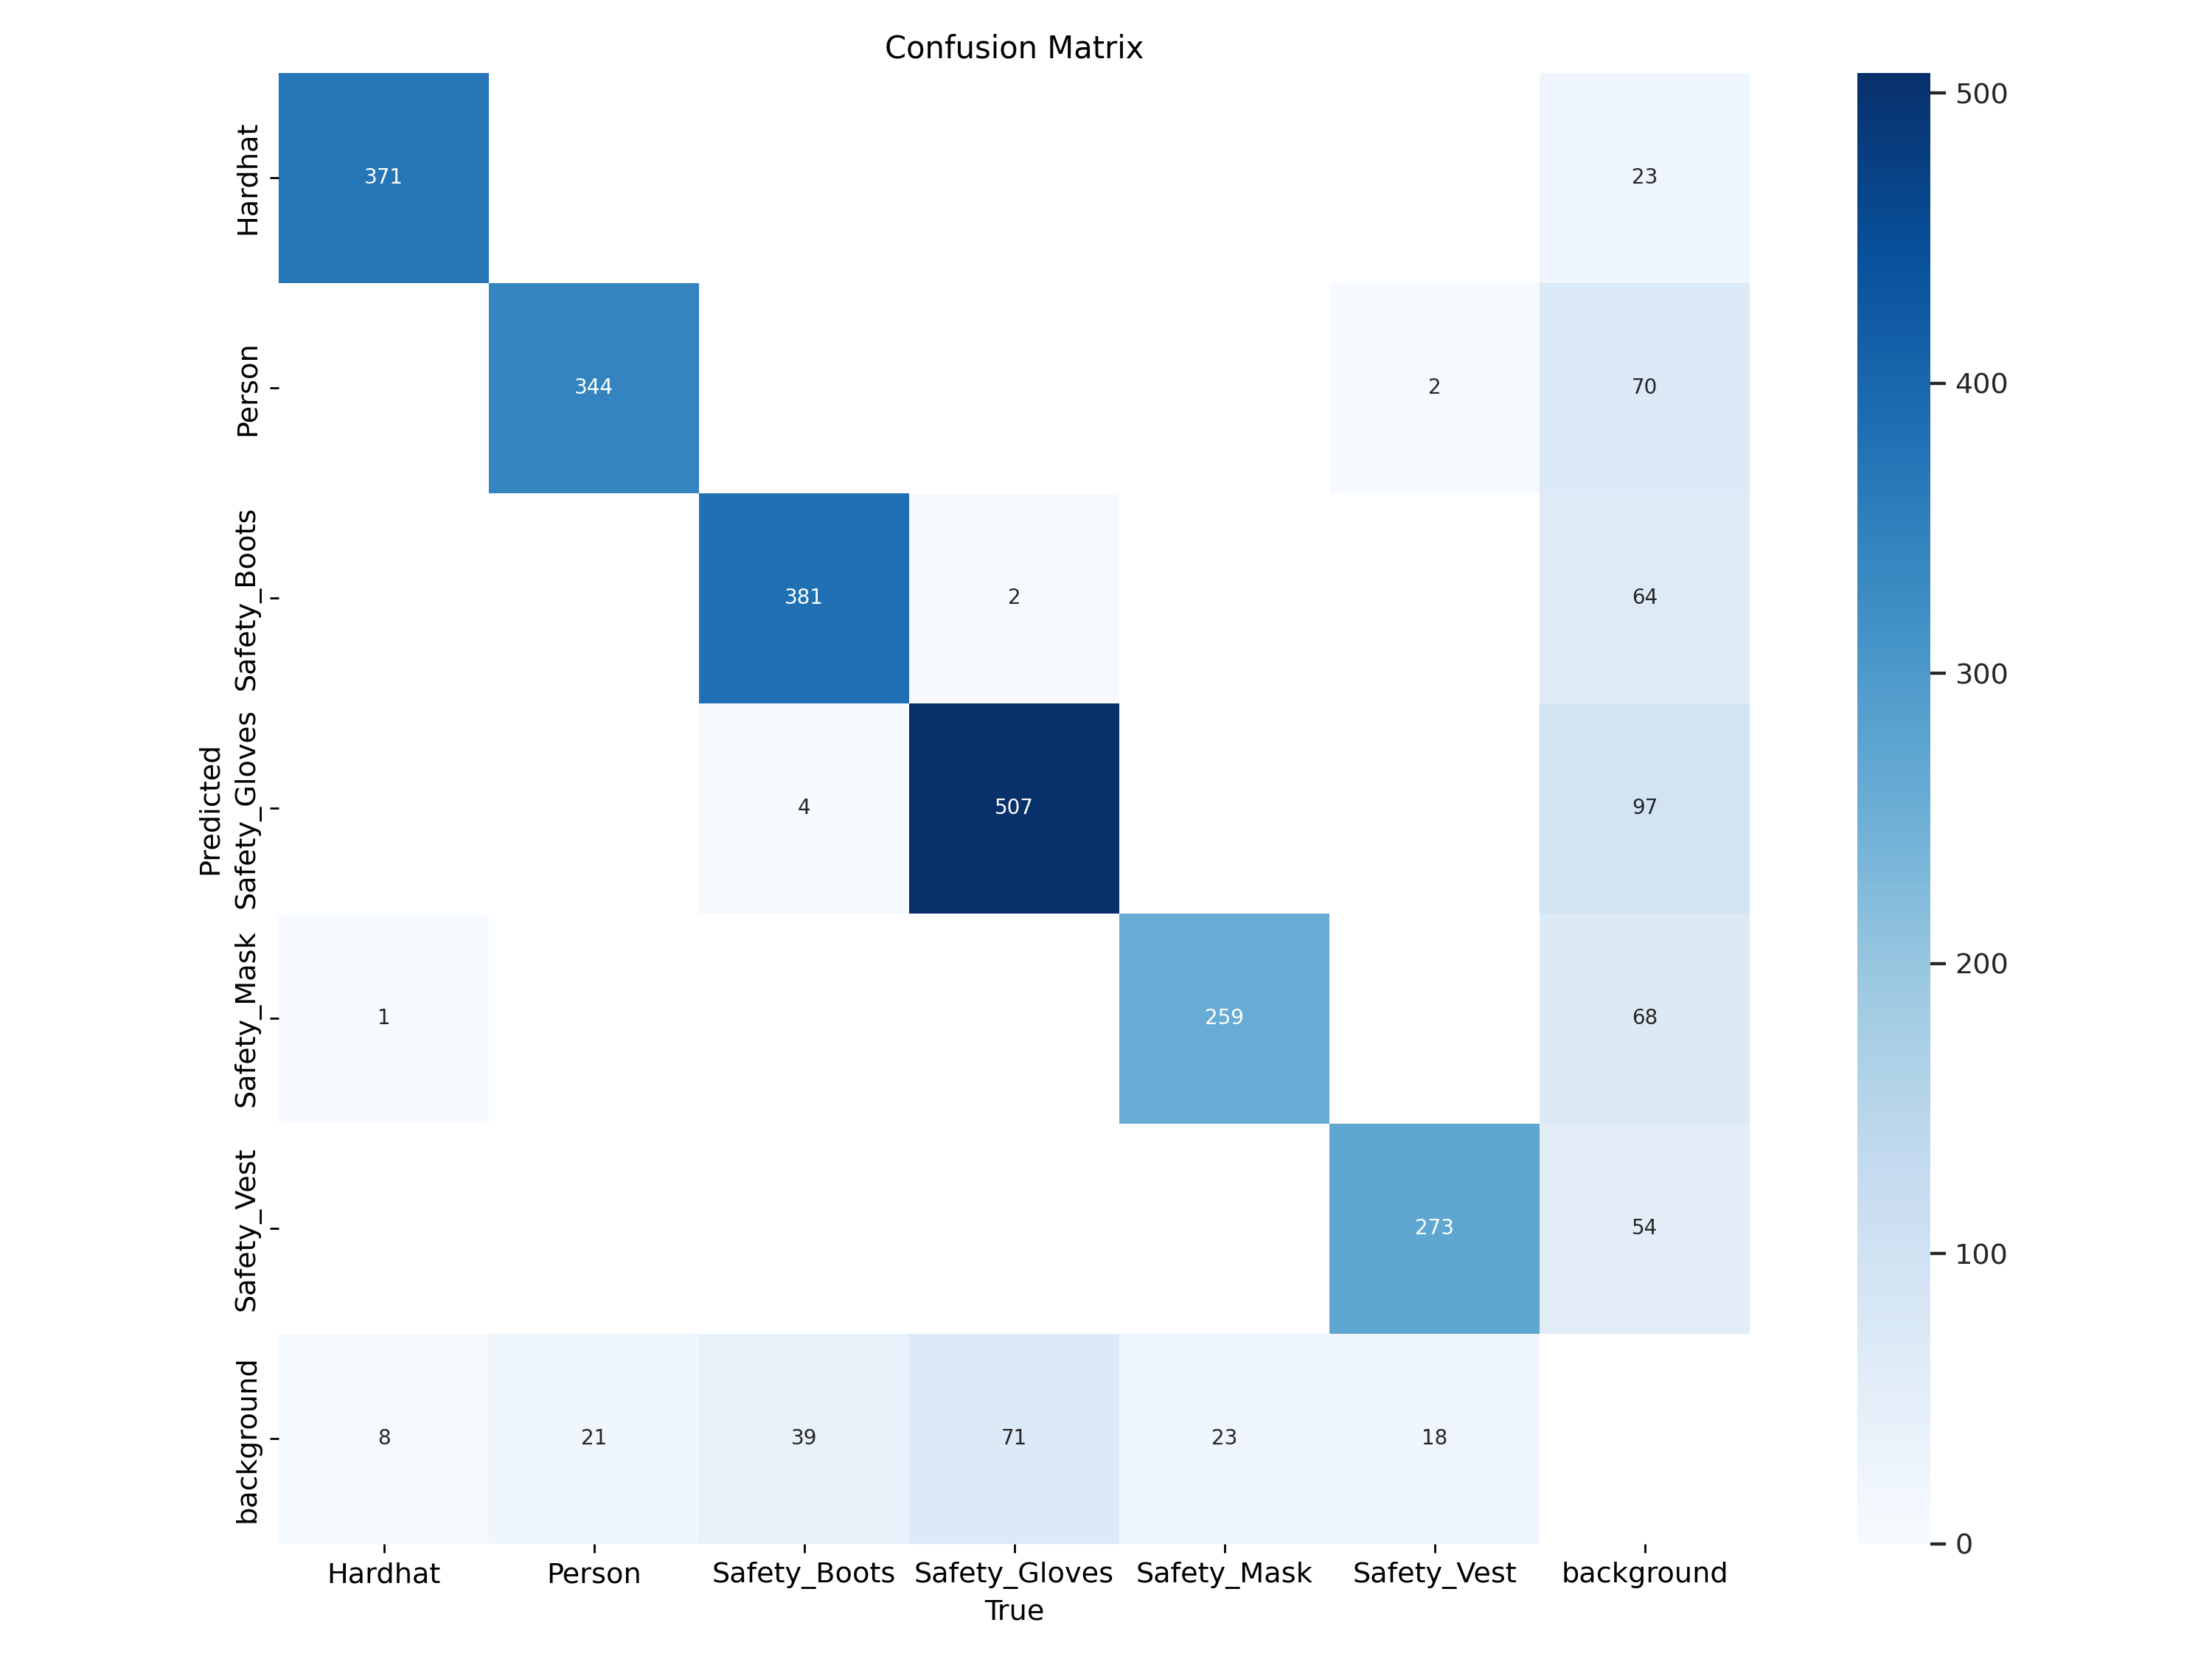

In [7]:
from IPython.display import Image
Image("/content/runs/detect/train/confusion_matrix.png",width=400)

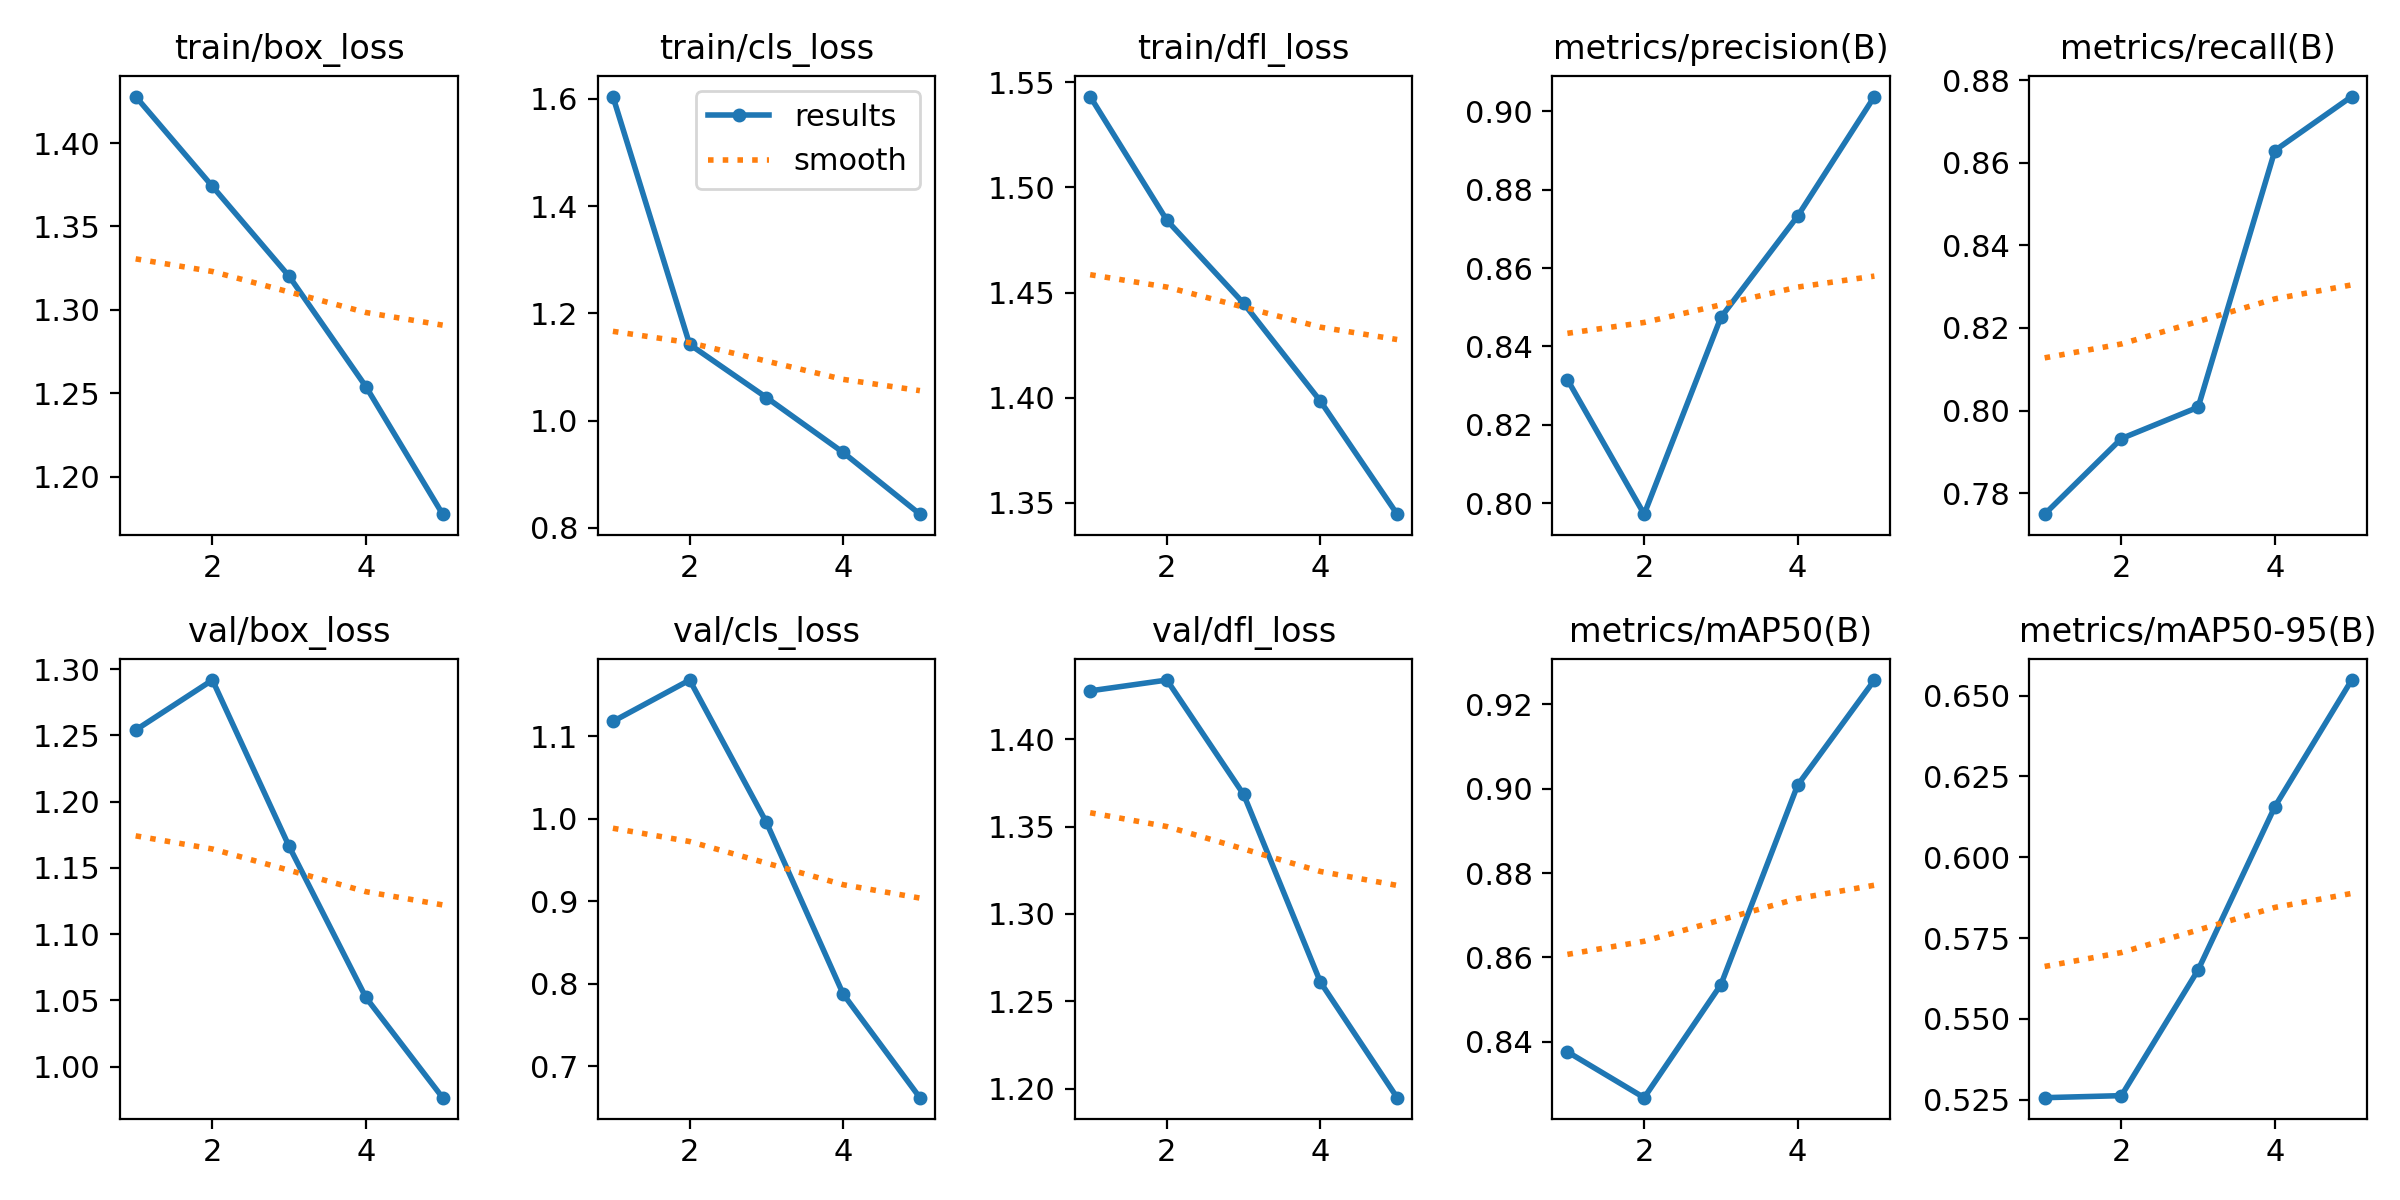

In [8]:
Image("/content/runs/detect/train/results.png",width=500)

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/PPE-1/valid/labels.cache... 596 images, 0 backgrounds, 0 corrupt: 100% 596/596 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 2324. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 38/38 [00:09<00:00,  4.04it/s]
                   all        596       2324      0.904      0.875      0.926      0.654
               Hardhat        354        380      0.963      0.964      0.987      0.821
                Person        287        365      0.934       0.86      0.944      0.718
          Safety_Boots        218        424      0

In [10]:
model_path="/content/runs/detect/train/weights/best.pt"

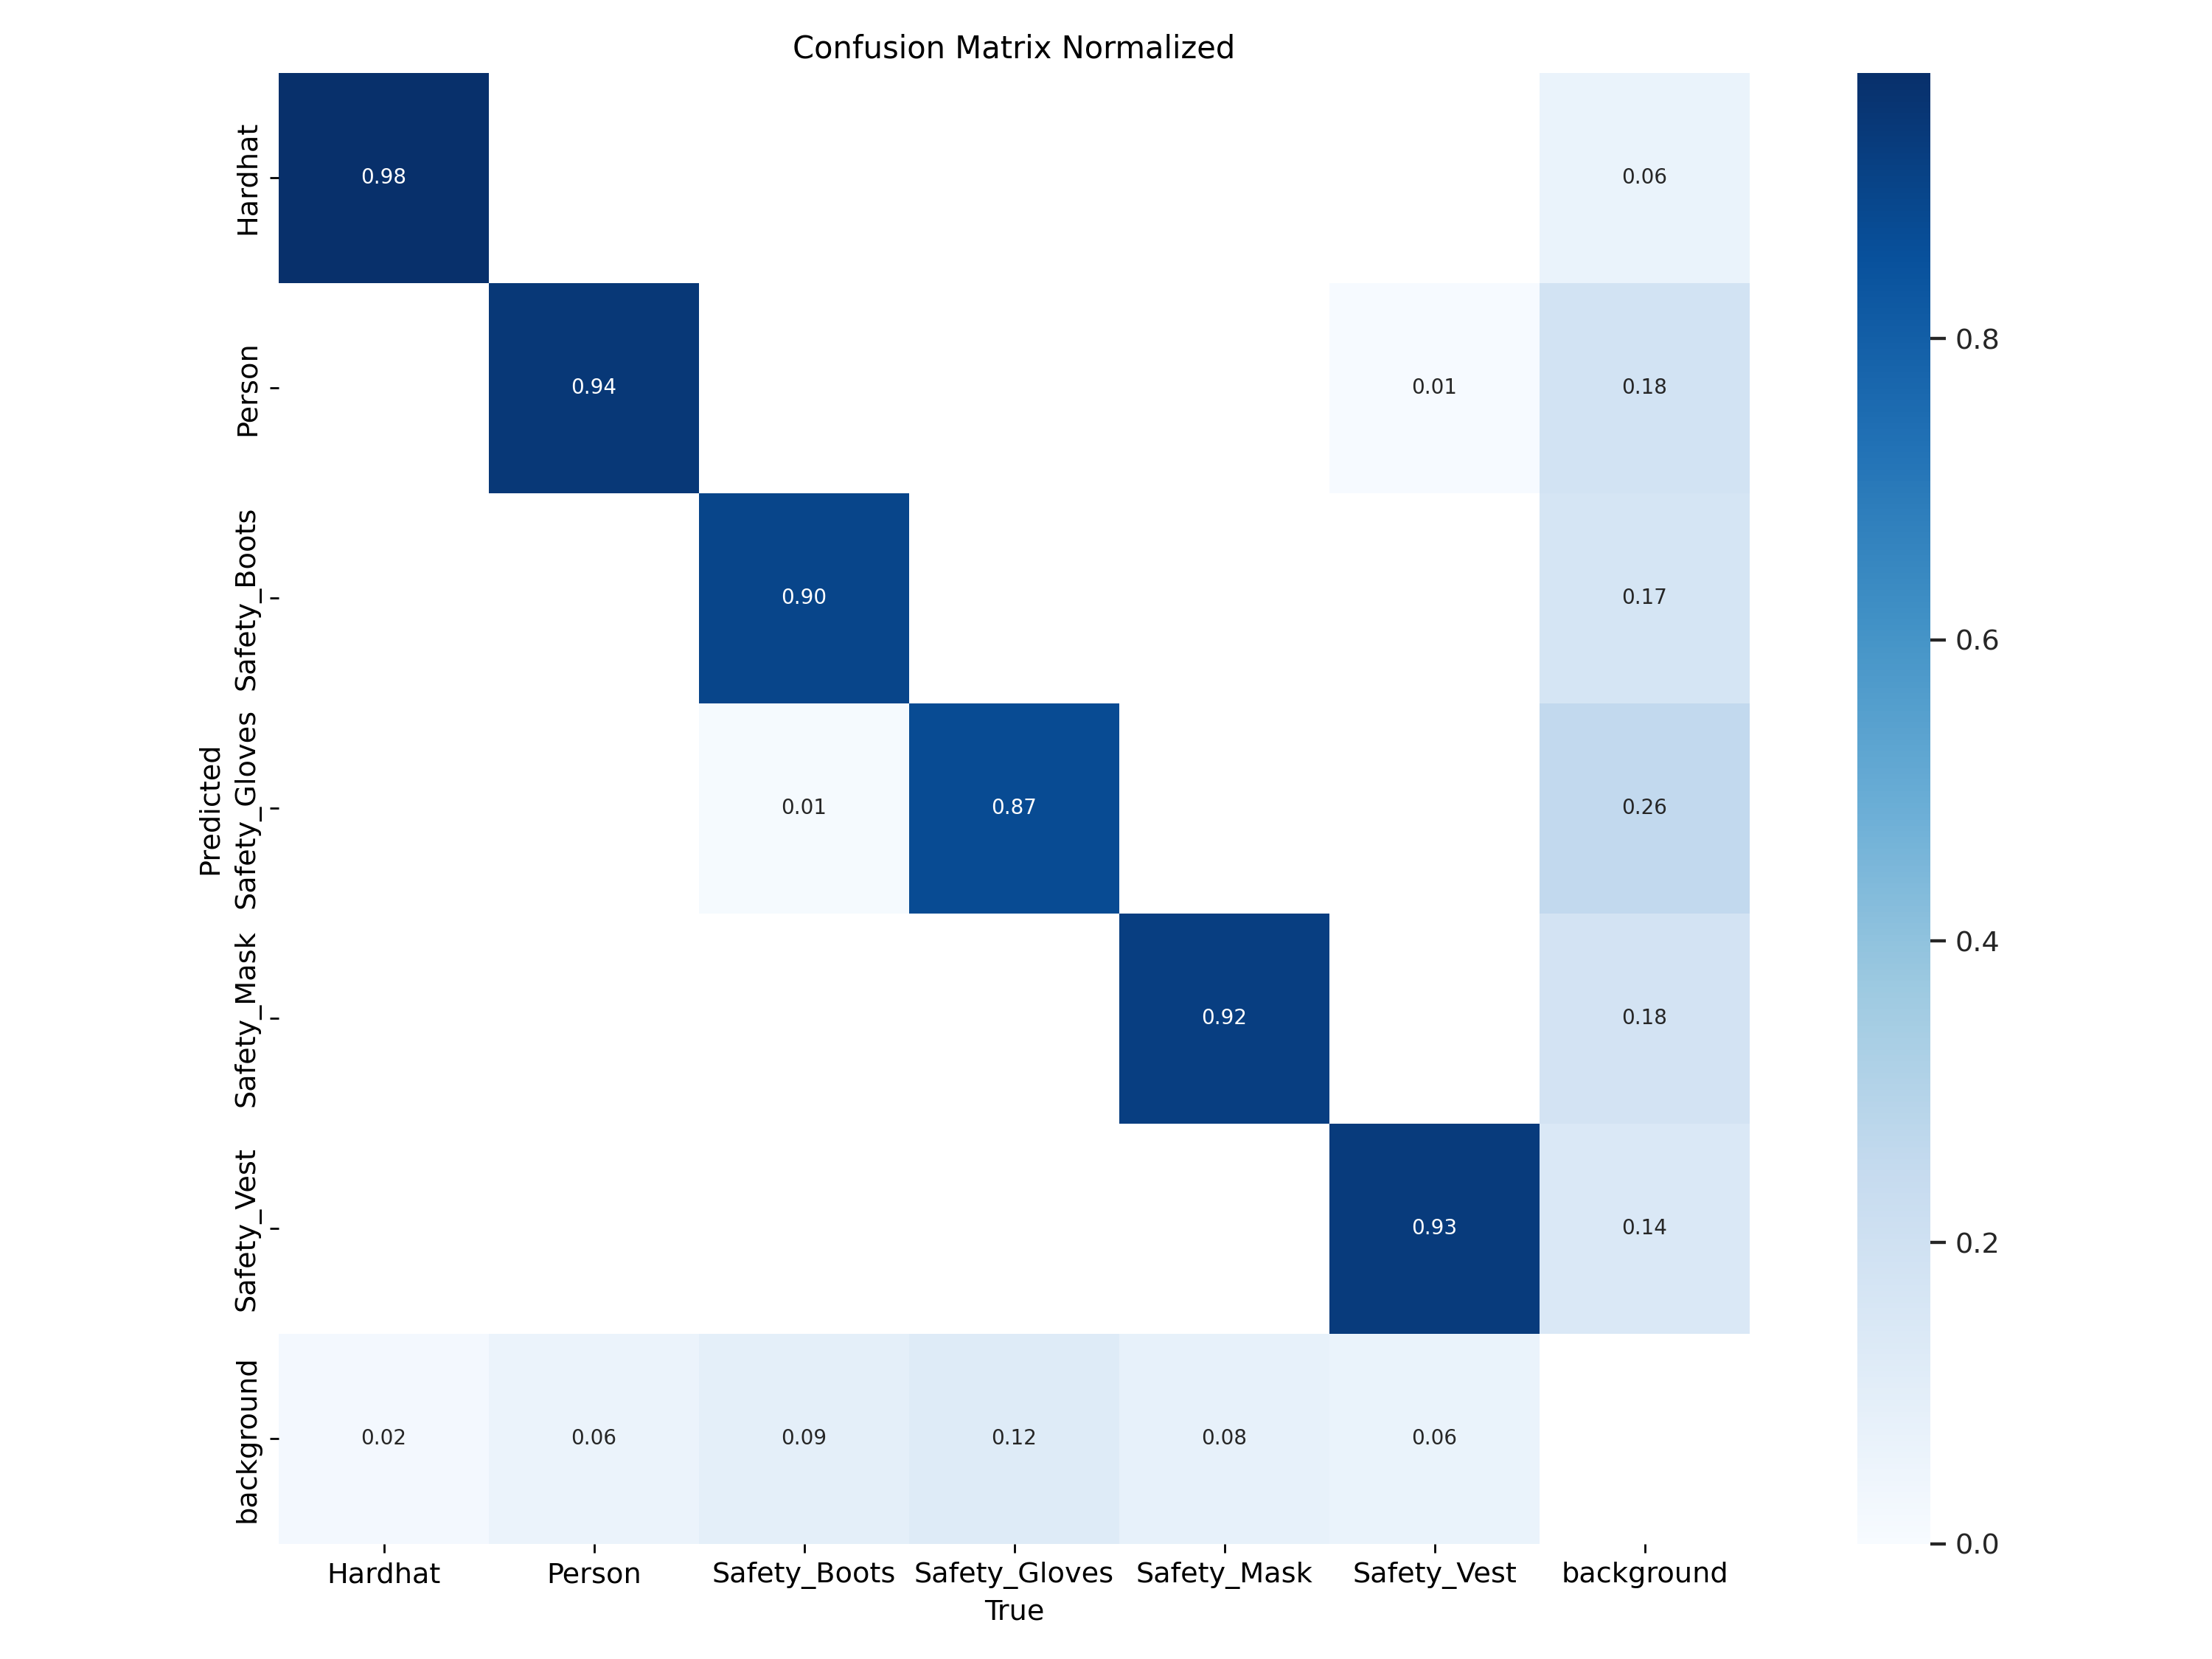

In [11]:
Image("/content/runs/detect/val/confusion_matrix_normalized.png",width=400)

In [12]:
import requests

def download_single_image(image_url, save_path):
    """
    Downloads a single image from a given URL.

    Args:
        image_url (str): The URL of the image to download.
        save_path (str): The path to save the downloaded image.
    """
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes
        with open(save_path, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        print(f"Image downloaded successfully to {save_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")


In [17]:
download_single_image("https://cdn.shopify.com/s/files/1/0226/1947/files/Encouraging_PPE_Use_-_Gloves_by_Web_large.jpg?9403222889542267372","001.png")

Image downloaded successfully to 001.png


In [18]:

!yolo task=detect mode=predict model="{model_path}" source='/content/001.png'

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/001.png: 448x640 1 Hardhat, 2 Safety_Glovess, 67.7ms
Speed: 5.0ms preprocess, 67.7ms inference, 81.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [40]:
#make a prediction
!yolo task=detect mode=predict model="{model_path}" source='/content/002.png'

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/002.png: 384x640 1 Safety_Gloves, 56.4ms
Speed: 2.9ms preprocess, 56.4ms inference, 127.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [30]:
download_single_image("https://d3rbxgeqn1ye9j.cloudfront.net/images/R0WBne5h_bwfxTCSglTMrzdlgxFirn2TFkeQD_hctxI/w:1920/h:1081/fn:Y3NtXzE5MjAtZ2xvdmVzLXN0YW5kYXJkc19jODc3NTA2ZGE5:t/cb:8a87cd75a9cbb61df48163b1040877fe8b882218/el:1/fq:jpeg:85:avif:70:webp:80/aHR0cHM6Ly9kM3JieGdlcW4xeWU5ai5jbG91ZGZyb250Lm5ldC9maWxlYWRtaW4vd3d3LnV2ZXgtc2FmZXR5LmNvLnVrL01lZGlhL2tub3dsZWRnZS8xOTIwLWdsb3Zlcy1zdGFuZGFyZHMuanBnPzE3NDAxNDgyODY","002.png")

Image downloaded successfully to 002.png


In [47]:
download_single_image("https://www.biospectrumasia.com/uploads/articles/philippine_board_of_investments-17613.jpg","003.png")

Image downloaded successfully to 003.png


In [49]:

!yolo task=detect mode=predict model="{model_path}" source='/content/003.png'

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/003.png: 448x640 3 Safety_Glovess, 1 Safety_Mask, 55.2ms
Speed: 4.1ms preprocess, 55.2ms inference, 96.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict8
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [34]:
import matplotlib.pyplot as plt
from PIL import Image

def display_images_grid(original_image_path, predicted_image_path):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    axes[0].imshow(Image.open(original_image_path))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(Image.open(predicted_image_path))
    axes[1].set_title('Predicted Image')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()



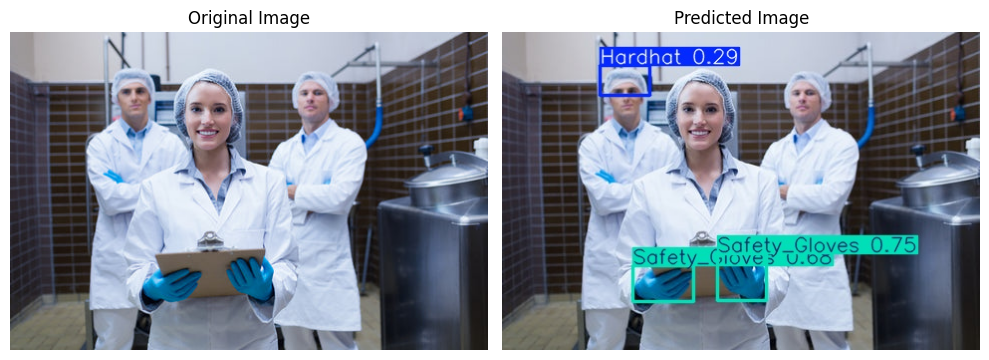

In [35]:
display_images_grid("/content/001.png", "/content/runs/detect/predict2/001.jpg")

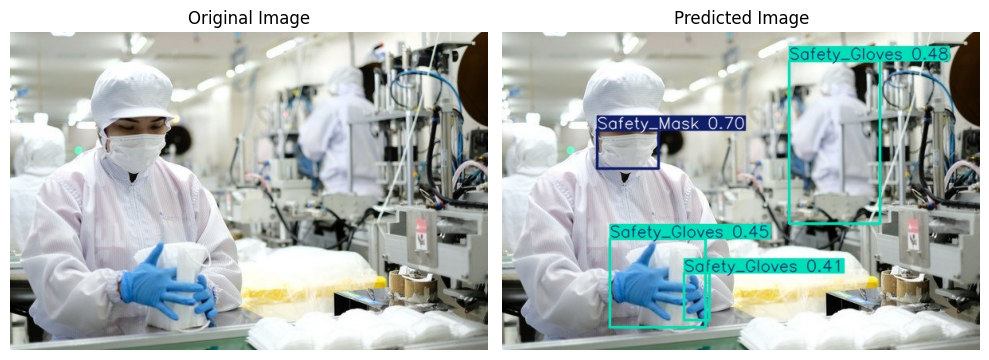

In [50]:
display_images_grid("/content/003.png", "/content/runs/detect/predict8/003.jpg")